<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_4_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,45.866658,75.921912,-2581.315422,-2449.526851,-1025.001756,-1424.525096
1,0.0,1.0,21.991031,29.751787,598.636292,660.379109,468.461017,191.918092
2,0.0,2.0,48.807217,29.775989,-660.029987,-571.446780,466.091209,-1037.537989
3,0.0,3.0,62.123383,81.115051,927.278804,1080.517238,-1193.787453,2274.304691
4,0.0,4.0,31.044014,91.679383,-8002.179575,-7869.456178,-1533.347850,-6336.108328
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,32.811920,52.262249,3784.636336,3879.710505,164.118831,3715.591674
119996,999.0,116.0,47.770402,37.919117,1505.270634,1600.960153,276.870535,1324.089618
119997,999.0,117.0,47.789142,88.839047,12840.677860,12987.306048,-790.608961,13777.915009
119998,999.0,118.0,20.240391,80.607304,-6064.142656,-5953.294961,-272.081552,-5681.213409


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2             e             Y        y_hat  \
rep   index                                                                  
0.0   0.0    45.866658  75.921912  -2581.315422  -2449.526851 -1025.001756   
      1.0    21.991031  29.751787    598.636292    660.379109   468.461017   
      2.0    48.807217  29.775989   -660.029987   -571.446780   466.091209   
      3.0    62.123383  81.115051    927.278804   1080.517238 -1193.787453   
      4.0    31.044014  91.679383  -8002.179575  -7869.456178 -1533.347850   
...                ...        ...           ...           ...          ...   
999.0 115.0  32.811920  52.262249   3784.636336   3879.710505   164.118831   
      116.0  47.770402  37.919117   1505.270634   1600.960153   276.870535   
      117.0  47.789142  88.839047  12840.677860  12987.306048  -790.608961   
      118.0  20.240391  80.607304  -6064.142656  -5953.294961  -272.081552   
      119.0  55.419465  93.798859   4322.611117   4481.829440  -990.395343   

                    e_hat  
rep   index                
0.0   0.0    -1424.525096  
      1.0      191.918092  
      2.0    -1037.537989  
      3.0     2274.304691  
      4.0    -6336.108328  
...                   ...  
999.0 115.0   3715.591674  
      116.0   1324.089618  
      117.0  13777.915009  
      118.0  -5681.213409  
      119.0   5472.224783  

[120000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2             e             Y        y_hat  \
rep   index                                                                  
0.0   0.0    45.866658  75.921912  -2581.315422  -2449.526851 -1025.001756   
      1.0    21.991031  29.751787    598.636292    660.379109   468.461017   
      2.0    48.807217  29.775989   -660.029987   -571.446780   466.091209   
      3.0    62.123383  81.115051    927.278804   1080.517238 -1193.787453   
      4.0    31.044014  91.679383  -8002.179575  -7869.456178 -1533.347850   
...                ...        ...           ...           ...          ...   
999.0 115.0  32.811920  52.262249   3784.636336   3879.710505   164.118831   
      116.0  47.770402  37.919117   1505.270634   1600.960153   276.870535   
      117.0  47.789142  88.839047  12840.677860  12987.306048  -790.608961   
      118.0  20.240391  80.607304  -6064.142656  -5953.294961  -272.081552   
      119.0  55.419465  93.798859   4322.611117   4481.829440  -990.395343   

                    e_hat  
rep   index                
0.0   0.0    -1424.525096  
      1.0      191.918092  
      2.0    -1037.537989  
      3.0     2274.304691  
      4.0    -6336.108328  
...                   ...  
999.0 115.0   3715.591674  
      116.0   1324.089618  
      117.0  13777.915009  
      118.0  -5681.213409  
      119.0   5472.224783  

[120000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,45.866658,75.921912,-2581.315422,-2449.526851,-1025.001756,-1424.525096
1,0.0,1.0,21.991031,29.751787,598.636292,660.379109,468.461017,191.918092
2,0.0,2.0,48.807217,29.775989,-660.029987,-571.446780,466.091209,-1037.537989
3,0.0,3.0,62.123383,81.115051,927.278804,1080.517238,-1193.787453,2274.304691
4,0.0,4.0,31.044014,91.679383,-8002.179575,-7869.456178,-1533.347850,-6336.108328
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,32.811920,52.262249,3784.636336,3879.710505,164.118831,3715.591674
119996,999.0,116.0,47.770402,37.919117,1505.270634,1600.960153,276.870535,1324.089618
119997,999.0,117.0,47.789142,88.839047,12840.677860,12987.306048,-790.608961,13777.915009
119998,999.0,118.0,20.240391,80.607304,-6064.142656,-5953.294961,-272.081552,-5681.213409


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2             e             Y        y_hat  \
rep   index                                                                  
0.0   0.0    45.866658  75.921912  -2581.315422  -2449.526851 -1025.001756   
      1.0    21.991031  29.751787    598.636292    660.379109   468.461017   
      2.0    48.807217  29.775989   -660.029987   -571.446780   466.091209   
      3.0    62.123383  81.115051    927.278804   1080.517238 -1193.787453   
      4.0    31.044014  91.679383  -8002.179575  -7869.456178 -1533.347850   
...                ...        ...           ...           ...          ...   
999.0 115.0  32.811920  52.262249   3784.636336   3879.710505   164.118831   
      116.0  47.770402  37.919117   1505.270634   1600.960153   276.870535   
      117.0  47.789142  88.839047  12840.677860  12987.306048  -790.608961   
      118.0  20.240391  80.607304  -6064.142656  -5953.294961  -272.081552   
      119.0  55.419465  93.798859   4322.611117   4481.829440  -990.395343   

                    e_hat  
rep   index                
0.0   0.0    -1424.525096  
      1.0      191.918092  
      2.0    -1037.537989  
      3.0     2274.304691  
      4.0    -6336.108328  
...                   ...  
999.0 115.0   3715.591674  
      116.0   1324.089618  
      117.0  13777.915009  
      118.0  -5681.213409  
      119.0   5472.224783  

[120000 rows x 6 columns]

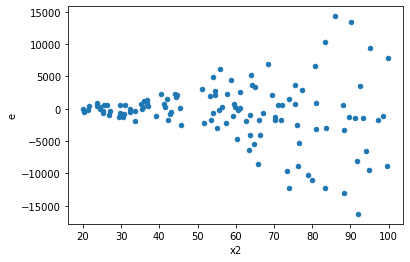

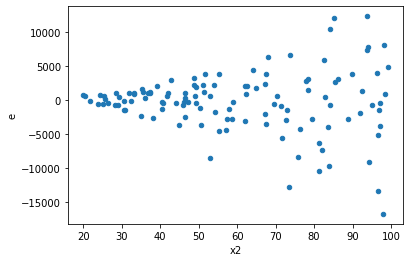

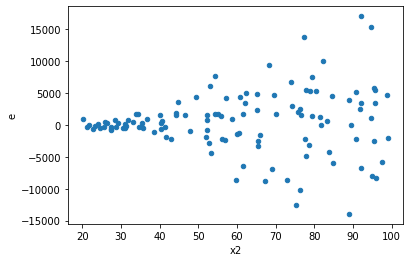

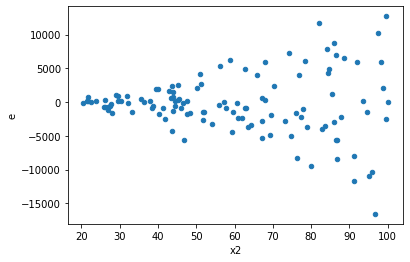

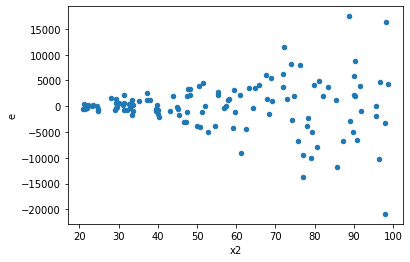

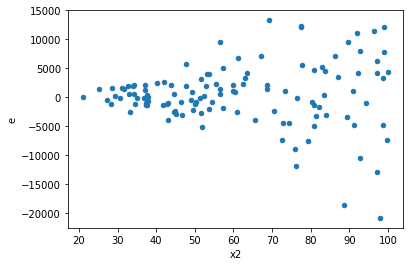

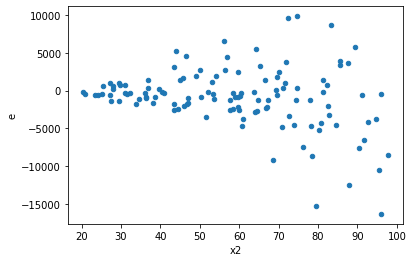

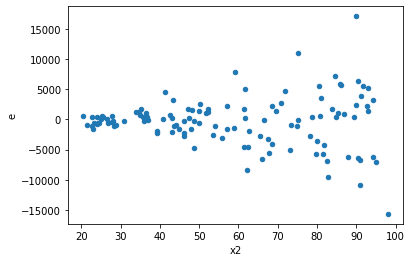

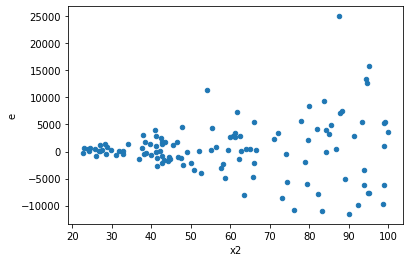

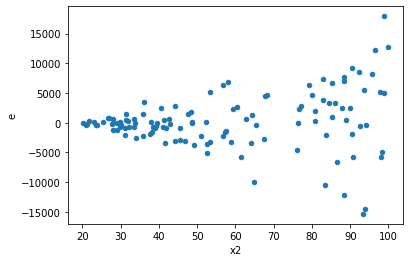

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,62.0,54.0,263521361.64105397,2089707525.7066286,4250344.542597645,38698287.513085715,9.104741303968462,5.1736392947532295e-14,0.9999999999999741,2.5868196473766147e-14,Reject001=0 : Heteroscedasticity
2.0,65.0,51.0,1343387898.6868844,1281066825.9599879,20667506.133644376,25118957.37176447,1.2153840530800004,0.4714939877905744,0.7642530061047128,0.2357469938952872,Reject001=1 : Homoscedasticity
3.0,60.0,56.0,202254177.24316818,2157121246.816608,3370902.954052803,38520022.264582284,11.427211874572077,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
4.0,66.0,50.0,326256726.6960229,2617093413.2936873,4943283.737818529,52341868.265873745,10.588481471422114,9.769962616701378e-15,0.9999999999999951,4.884981308350689e-15,Reject001=0 : Heteroscedasticity
5.0,62.0,54.0,1716280245.0684247,1654277507.503936,27681939.436587494,30634768.657480296,1.106669882276746,0.7063382622190306,0.6468308688904847,0.3531691311095153,Reject001=1 : Homoscedasticity
6.0,48.0,68.0,516084870.89204985,1295541398.8314893,10751768.143584372,19052079.394580726,1.7719950002780878,0.029792994825660557,0.9851035025871697,0.014896497412830279,Reject001=1 : Homoscedasticity
7.0,59.0,57.0,142176171.41020858,1876563599.058069,2409765.6171221794,32922168.404527526,13.661979476595011,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
8.0,49.0,67.0,796924686.579089,2237904702.678691,16263769.11385896,33401562.726547625,2.0537405869888374,0.006318679797547411,0.9968406601012263,0.0031593398987737054,Reject001=0 : Heteroscedasticity
10.0,56.0,60.0,1198700283.8637037,1678918726.1306581,21405362.211851854,27981978.768844303,1.307241544987782,0.3085401050852852,0.8457299474573574,0.1542700525426426,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,54.0,62.0,2320880240.697942,272253077.5786471,42979263.71662855,4391178.67062334,0.10216970443177707,1.0299186924426757e-14,Reject001=0 : Heteroscedasticity
1.0,62.0,54.0,263521361.64105397,2089707525.7066286,4250344.542597645,38698287.513085715,9.104741303968462,5.1736392947532295e-14,Reject001=0 : Heteroscedasticity
2.0,65.0,51.0,1343387898.6868844,1281066825.9599879,20667506.133644376,25118957.37176447,1.2153840530800004,0.4714939877905744,Reject001=1 : Homoscedasticity
3.0,60.0,56.0,202254177.24316818,2157121246.816608,3370902.954052803,38520022.264582284,11.427211874572077,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
4.0,66.0,50.0,326256726.6960229,2617093413.2936873,4943283.737818529,52341868.265873745,10.588481471422114,9.769962616701378e-15,Reject001=0 : Heteroscedasticity
5.0,62.0,54.0,1716280245.0684247,1654277507.503936,27681939.436587494,30634768.657480296,1.106669882276746,0.7063382622190306,Reject001=1 : Homoscedasticity
6.0,48.0,68.0,516084870.89204985,1295541398.8314893,10751768.143584372,19052079.394580726,1.7719950002780878,0.029792994825660557,Reject001=1 : Homoscedasticity
7.0,59.0,57.0,142176171.41020858,1876563599.058069,2409765.6171221794,32922168.404527526,13.661979476595011,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
8.0,49.0,67.0,796924686.579089,2237904702.678691,16263769.11385896,33401562.726547625,2.0537405869888374,0.006318679797547411,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    646
Reject001=1 : Homoscedasticity      354
Name: Result_test, dtype: int64